In [4]:
from sklearn import model_selection, datasets, linear_model, metrics

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
reg_x, reg_y, coef = datasets.make_regression(n_samples = 10000, n_features=5, n_informative=3, n_targets=1, random_state=18042002, coef=True)

In [13]:
coef

array([ 81.96796737,  80.05501164,   0.        ,   0.        ,  74.19813855])

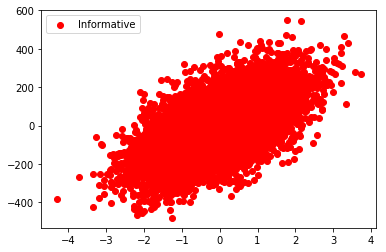

In [32]:
pylab.scatter(reg_x[:, 0], reg_y, color='r', label='Informative')
pylab.legend()

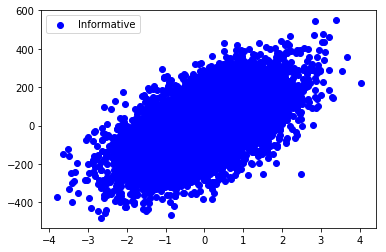

In [33]:
pylab.scatter(reg_x[:, 1], reg_y, color='b', label='Informative')
pylab.legend()

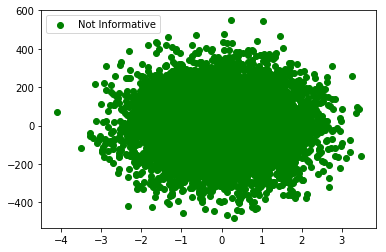

In [34]:
pylab.scatter(reg_x[:, 2], reg_y, color='g', label='Not Informative')
pylab.legend()

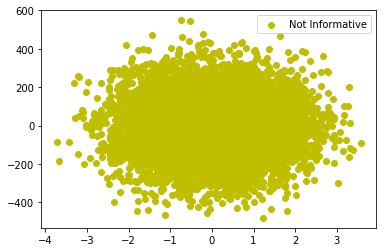

In [35]:
pylab.scatter(reg_x[:, 3], reg_y, color='y', label='Not Informative')
pylab.legend()

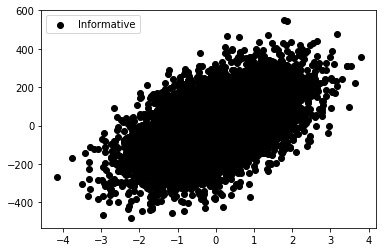

In [36]:
pylab.scatter(reg_x[:, 4], reg_y, color='k', label='Informative')
pylab.legend()

In [37]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(reg_x, reg_y, test_size = 0.3)

In [38]:
model = linear_model.LinearRegression(fit_intercept=True)

In [39]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
test_y_ = model.predict(test_x)

In [43]:
metrics.mean_absolute_error(test_y, test_y_)

8.929572359317462e-14

In [45]:
metrics.mean_squared_error(test_y, test_y_)

1.2466407973528714e-26

In [46]:
metrics.r2_score(test_y, test_y_)

1.0

In [50]:
cv_model = linear_model.LinearRegression()
cv = model_selection.KFold(n_splits=5)
for tr_i, ts_i in cv.split(reg_x):
    cv_model.fit(reg_x[tr_i], reg_y[tr_i])
    cv_y_ = cv_model.predict(reg_x[ts_i])
    print("MAE:", metrics.mean_absolute_error(reg_y[ts_i], cv_y_))
    print("MSE:", metrics.mean_squared_error(reg_y[ts_i], cv_y_))
    print("R2:", metrics.r2_score(reg_y[ts_i], cv_y_))

MAE: 9.37882133067e-14
MSE: 1.39452674843e-26
R2: 1.0
MAE: 9.67307900446e-14
MSE: 1.47415371019e-26
R2: 1.0
MAE: 1.68415920099e-13
MSE: 4.44635645916e-26
R2: 1.0
MAE: 1.15118890115e-13
MSE: 2.13052897445e-26
R2: 1.0
MAE: 6.99729146153e-14
MSE: 7.7445623795e-27
R2: 1.0
